# Project 1: Regression and Shrinkage

### Submitted by: Prateek Kumar

## Part 1: Generate Training and Testing Data

#### Importing the required packages 

In [1]:
import numpy as np                                  # import numpy
import matplotlib.pyplot as plt                     # import matplotlib.pyplot for plotting framework
from mpl_toolkits.mplot3d import Axes3D             # plot 3D objects on a 2D matplotlib figure
import pandas as pd                                 # import pandas package
import math                                         # import math package

#### Generating 200 3-dimensional training samples uniformly from a hypercube centered at the origin with edge length of 20. 

In [2]:
xi=np.random.uniform(low=-10,high=10,size=(3,200))

#### Generating "noisy" labels for each sample

In [3]:
wt=[-0.8,2.1,1.5]                           # w-transpose
b=10                                        # b value
variance=10                                 # variance
mu=0                                        # mean
sigma=np.sqrt(variance)                     # std deviation
eps=np.random.normal(mu,sigma,200)          # Generating Normal Distribution
yi=np.dot(wt,xi)+(b+eps)                    # Finally the noisy samples

#### 3D scatter plot of all 200 samples

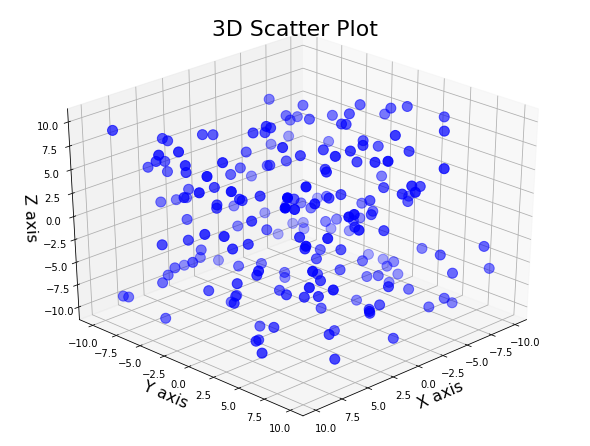

In [4]:
x = xi[0,:]
y = xi[1,:]
z = xi[2,:]

fig=plt.figure(figsize=(8,6))
ax=Axes3D(fig)
ax.scatter(x,y,z,color='b',s=100)
ax.set_xlabel('X axis', fontsize=16)                           # X-Axis
ax.set_ylabel('Y axis', fontsize=16)                           # Y-Axis
ax.set_zlabel('Z axis', fontsize=16)                           # Z-Axis
ax.view_init(30, 45)                                           # rotating the plot to get a better view
plt.title('3D Scatter Plot', fontsize=22)                      # Title of the plot
plt.show()

## Part 2: Fit and Evaluate a Ridge Regression Model

##### Standardizing the data to zero-mean and unit-variance 

In [5]:
mu_xi=xi.mean()                     # calculating mean of samples
std_xi=xi.std()                     # calculating std deviation of samples
xi_new=(xi-mu_xi)/std_xi            # standardising the data

mu_yi=yi.mean()                     # calculating mean of noisy data
yi_new=(yi-mu_yi)                   # standardising the noisy data

#### Using 100 of the random samples as training data, and the other 100 samples for testing. 

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xi_new.T,yi_new.T,test_size=0.5)

#### Ridge Regression Function 

In [7]:
# Here we are solving for beta which gives the ridge regression estimate
def ridgeregression(X,y):
    beta_list=[]
    df_list=[]
    for i in range(0,1001,10):                                        # Running the loop for each lambda value for 0:0.1:10
        lam_par=i/100
        xtranspose=np.transpose(X)
        xtransx=np.dot(xtranspose,X)                                  # dot product of x and x-transpose
        lamidentity=np.dot(lam_par,np.identity(xtransx.shape[0]))     # dot product of lambda and Identity matrix
        matinv=np.linalg.inv(xtransx+lamidentity)                     # taking the inverse of their sum
        xtransy=np.dot(xtranspose,y)
        beta=np.dot(matinv,xtransy)                                   # the final beta value
        df=lam_par
        beta_list.append(beta)
        df_list.append(df)
    return beta_list, df_list                                         # returning the beta values and lambda values in a list

#### Calling the Ridge Regression Function

In [8]:
beta_list, df_list=ridgeregression(x_train, y_train)

#####  Converting the beta values and lambda values into the array form

In [9]:
betaArray=np.asarray(beta_list)
dfArray=np.asarray(df_list)

##### Plot of Beta over Lambda values

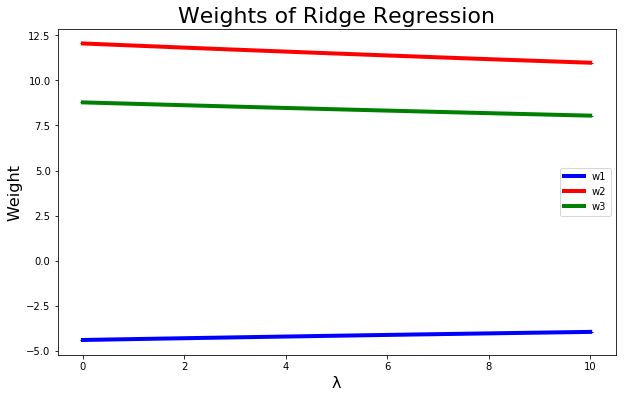

In [10]:
plt.figure(figsize=(10,6))  
plt.plot(dfArray, betaArray[:,0],c='b',marker='_',label='w1', linewidth=4)
plt.plot(dfArray, betaArray[:,1],c='r',marker='_',label='w2', linewidth=4)
plt.plot(dfArray, betaArray[:,2],c='g',marker='_',label='w3', linewidth=4)
plt.xlabel('λ', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Weights of Ridge Regression', fontsize=22) 
plt.legend(loc='best') 
plt.show()

##### Evaluating the performance using the test data 

In [11]:
def predictridge(X,y,beta):
    SSE_list=[]
    lambd_list=[]
    for i in range(0,len(beta)):
        beta_val=beta[i]
        y_pred=np.dot(X,beta_val)
        SSE=np.sum(np.square(y-y_pred))      # calculating the sum-of-squared error
        SSE_list.append(SSE)                 # storing the SSE into a list
    return SSE_list

##### Calling the predictridge() function with the testing data

In [12]:
sse=predictridge(x_test,y_test,betaArray)

##### Plot of SSE values with varying hyperparameter, λ

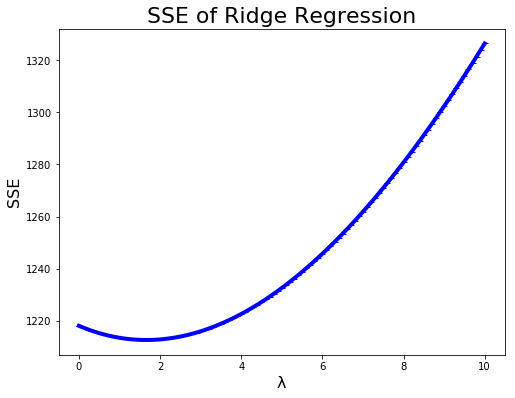

In [13]:
plt.figure(figsize=(8,6))  
plt.plot(dfArray,sse,c='b',marker='_', linewidth=4)
plt.xlabel('λ', fontsize=16)
plt.ylabel('SSE', fontsize=16)
plt.title('SSE of Ridge Regression', fontsize=22) 
plt.show()

## Part 3: Fit and Evaluate a Lasso Regression Model

In [14]:
from cvxopt import matrix, solvers                       # library for quadratic programming

##### Function to calculate the OLS -->  (X'X)−1X'y

In [15]:
def ols(X,y):                                            
    xtranspose=np.transpose(X)
    xtransx=np.dot(xtranspose,X)
    inv=np.linalg.inv(xtransx)
    xtransy=np.dot(xtranspose,y)
    OLS=np.dot(inv,xtransy)
    return(matrix(OLS))

##### Lasso Regression Function 

In [16]:
def lassoregression(X,y):                                       # Here we implement quadratic programming
    beta_list=[]
    df_list=[]
    lam_inlis=[]
        
    xtranspose=np.transpose(X)                                   # calculating H
    xtransx=np.dot(xtranspose,X)
    H=xtransx
    H=2*matrix(H)
    
    ytransx=np.dot(xtranspose,y)                                # calculating f (here named as ftrans)
    ftrans=-2*matrix(ytransx)
        
    A = []
    A = ols(X,y)                                                # storing OLS for λ = 0 in A
    
    for i in range(0,1001,10):                                  # generating T values which here is 1/λ
        if(i!=0):
            lam_inlis.append(1/(i/100))
            lam_par=i/100
            df=lam_par
            df_list.append(df)
    lam_mat=matrix(lam_inlis)                                   # stored T values in lam_inlis and λ values in df_list
    
    
    for j in range(0,len(lam_inlis)):
        count=0
        A1=np.sign(A)                                           # storing the sign of OLS in A1
        T_val=lam_mat[j:j+1]                                    # for each T value
        solvers.options['show_progress'] = False                # disabling the qp() function output log
        
        if(np.sum(np.absolute(np.array(A)))<=T_val):            # checking the condition for absolute sum
            beta_list.append(np.array(A))
        else:
            while(np.sum(np.absolute(np.array(A)))>T_val):      # while loop till the absolute sum condition is true
                if(count==0):
                    A=solvers.qp(H,ftrans,matrix(np.transpose(A1)),T_val) # running the qp() function
                    A=A['x']                                    # new weight values

                else:
                    sig=np.sign(A)                              # sign of new weight values
                    if(A1.shape[1]!=3):                         # appending the sign matrix A1
                        A1=np.append(np.transpose(A1),np.transpose(sig),axis=0)
                    else:
                        A1=np.append(A1,np.transpose(sig),axis=0)
                    
                    # running the qp() function again with updated A and B values
                    A=solvers.qp(H,ftrans,matrix(A1),matrix(np.repeat(T_val,count+1,axis=0)))
                    A=A['x']
                count+=1
                A=np.array(A)                                   # the weights value which satisfies the absolute sum condition
            beta_list.append(A)                                 # storing the weights

    return beta_list, df_list, lam_inlis

##### Calling the Lasso Regression function 

In [17]:
beta_list, df_list, df_inv_list=lassoregression(x_train, y_train)
betaArray=np.asarray(beta_list)
dfArray=np.asarray(df_list)
df_inv_Array=np.asarray(df_inv_list)

##### Weights of Lasso Regression plot

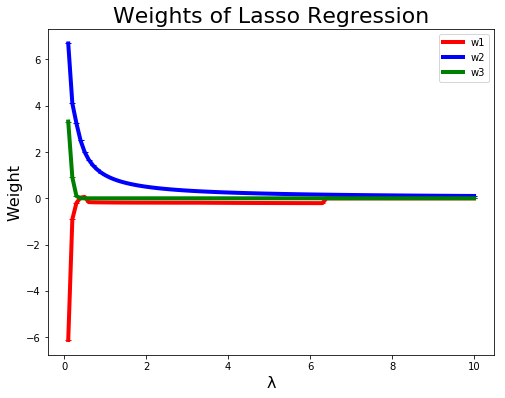

In [18]:
plt.figure(figsize=(8,6))  
plt.plot(dfArray, 1000000*betaArray[:,0],c='r',label='w1',marker='_', linewidth=4)
plt.plot(dfArray, betaArray[:,1],c='b',label='w2',marker='_', linewidth=4)
plt.plot(dfArray, betaArray[:,2],c='g',label='w3',marker='_', linewidth=4)
plt.xlabel('λ', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Weights of Lasso Regression', fontsize=22) 
plt.legend(loc='best') 
plt.show()

##### Evaluating the performance using the test data 

In [19]:
def predictlasso(X,y,beta):
    SSE_list=[]
    lambd_list=[]
    for i in range(0,len(beta)):
        beta_val=beta[i]
        y_pred=np.dot(X,beta_val)
        SSE=1/np.sum(np.square(y-y_pred))
        SSE_list.append(SSE)
        #print(y_pred.shape)
    return SSE_list

##### Calling the predictlasso() function with the testing data

In [20]:
sse=predictlasso(x_test,y_test,betaArray)

##### Plot of SSE values with varying hyperparameter, λ

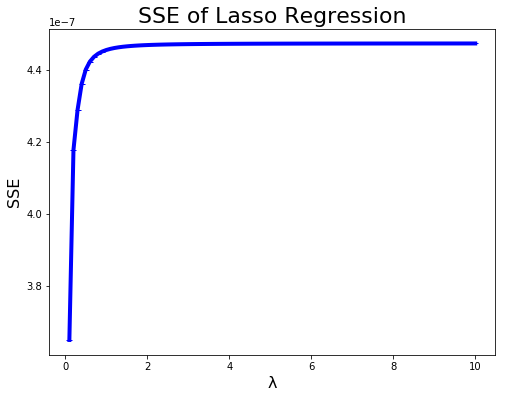

In [21]:
plt.figure(figsize=(8,6))  
plt.plot(dfArray,sse,c='b',marker='_', linewidth=4)
plt.xlabel('λ', fontsize=16)
plt.ylabel('SSE', fontsize=16)
plt.title('SSE of Lasso Regression', fontsize=22) 
plt.show()